### **Importing libraries**

In [ ]:
# !pip install umap-learn[plot]
# !pip install holoviews
# !pip install -U ipykernel

# !pip uninstall scipy -y
# !pip uninstall pingouin -y
# !pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import umap
from sklearn.decomposition import PCA
import pingouin as pg

### **Reading data file**

In [ ]:
# #Reading the training data Subject
# from google.colab import drive
# drive.mount('/content/drive')

### **Loading Dataset**

In [ ]:
def load_files():
    full_data = pd.DataFrame()
    for i in range(1, 11):
        mat = loadmat(f'/content/sample_data/Sub2sub {i}_Test.mat')
        data = pd.DataFrame(mat[f'Data{1}'])[[4, 5, 6, 7]]
        data['subject_num'] = [i] * len(data)
        full_data = pd.concat([full_data, data])
    return full_data

In [ ]:
full_data = load_files()
full_data

,4,5,6,7,subject_num
0,0.007947,0.005985,0.011474,0.960326,1
1,0.002410,0.005748,0.013646,0.941707,1
2,0.006262,0.006098,0.009462,0.957901,1
3,0.007739,0.003593,0.009989,0.940461,1
4,0.011756,0.007291,0.014906,0.946249,1
...,...,...,...,...,...
6013,0.100022,0.242943,0.073544,0.976094,10
6014,0.120007,0.320219,0.099409,0.990625,10
6015,0.129652,0.576716,0.169892,0.987485,10
6016,0.155142,0.332961,0.231001,0.954506,10


### **Grouping data by getting mean for every channel**

In [ ]:
full_data.groupby('subject_num').mean()


,4,5,6,7
subject_num,,,,
1,0.166661,0.184847,0.120630,0.866743
2,0.263785,0.196113,0.222508,0.812590
3,0.137399,0.123456,0.180790,0.904661
4,0.302957,0.199907,0.179957,0.918760
5,0.066510,0.076421,0.117408,0.019750
6,0.196260,0.181428,0.187670,0.868197
7,0.161127,0.077664,0.078932,0.026026
8,0.278618,0.304132,0.290272,0.779108
9,0.306095,0.195049,0.195117,0.846447


In [ ]:
stdby=full_data.groupby('subject_num').std()
stdby

,4,5,6,7
subject_num,,,,
1,0.122394,0.137870,0.080143,0.146316
2,0.152507,0.214194,0.217660,0.169671
3,0.144394,0.153136,0.132486,0.125216
4,0.196093,0.192594,0.088262,0.106858
5,0.050522,0.069870,0.064114,0.013535
6,0.144501,0.150594,0.136230,0.127511
7,0.130989,0.114184,0.087260,0.013101
8,0.144788,0.222989,0.154356,0.172781
9,0.134729,0.119369,0.117710,0.122885


In [ ]:
rsum=stdby.sum(axis=1)
x=(rsum/4)
x.sort_values()

subject_num
5     0.049510
7     0.086383
1     0.121681
9     0.123673
3     0.138808
6     0.139709
10    0.144094
4     0.145952
8     0.173729
2     0.188508
dtype: float64

### **Getting PCA**

Subject 1: Mean 1: 7.201047828769913e-17
Subject 1: Mean 2: 2.5970992169334114e-17
Subject 1: std 1: 0.19869632775476195
Subject 1: std 2: 0.1681886497214388
**************
Subject 4: Mean 1: -2.4835881243279135e-17
Subject 4: Mean 2: -7.095966069508324e-18
Subject 4: std 1: 0.23100506918385158
Subject 4: std 2: 0.20875997127332963
**************
Subject 7: Mean 1: 1.4163642573291032e-17
Subject 7: Mean 2: 1.0327656043024712e-17
Subject 7: std 1: 0.16332243185019432
Subject 7: std 2: 0.1309703408371717
**************


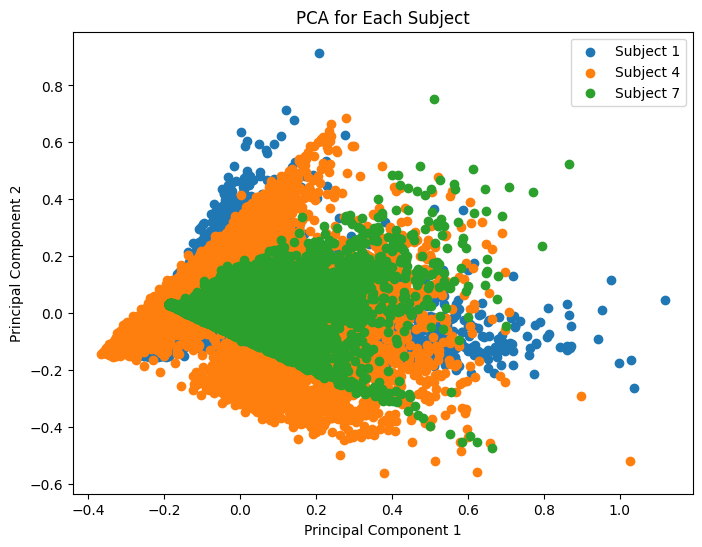

In [ ]:
sample = full_data[full_data['subject_num'].isin([1,4,5])]
grouped = sample.groupby('subject_num')

# Initialize PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed

plt.figure(figsize=(8, 6))
data = []

# Apply PCA for each subject and plot
for subject, group in grouped:
    pca.fit(group[[4, 5, 6, 7]])
    transformed = pca.transform(group[[4, 5, 6, 7]])
    plt.scatter(transformed[:, 0], transformed[:, 1], label=f"Subject {subject}")

 # Calculating means and standard deviations for each principal component
    mean1 = transformed[:, 0].mean()
    mean2 = transformed[:, 1].mean()
    std1 = transformed[:, 0].std()
    std2 = transformed[:, 1].std()

    # Append the results to the data list
    data.append((mean1, mean2, std1, std2))


    print("Subject %s: Mean 1: %s" % (subject, transformed[:, 0].mean()))
    print("Subject %s: Mean 2: %s" % (subject, transformed[:, ].mean()))
    print("Subject %s: std 1: %s" % (subject, transformed[:, 0].std()))
    print("Subject %s: std 2: %s" % (subject, transformed[:, ].std()))
    print("**************")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Each Subject')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr


# Convert to NumPy array for easier slicing
data_np = np.array(data)

# Extracting means and stds for correlation and distance calculations
means = data_np[:, :2]  # First two columns are means
stds = data_np[:, 2:]   # Last two columns are standard deviations

# Calculate Pearson Correlation for Means and Standard Deviations
corr_means = pearsonr(means[:, 0], means[:, 1])[0]  # Correlation between Mean1 and Mean2
corr_stds = pearsonr(stds[:, 0], stds[:, 1])[0]     # Correlation between Std1 and Std2

# Calculate Proximity (Distance) Measures
# Using Euclidean distance as an example. You can use other metrics like 'cosine', 'cityblock' (Manhattan)
distance_matrix_means = squareform(pdist(means, metric='euclidean'))
distance_matrix_stds = squareform(pdist(stds, metric='euclidean'))

# Print the results
print("Correlation between Mean1 and Mean2 across all subjects:", corr_means)
print("Correlation between Std1 and Std2 across all subjects:", corr_stds)

print("Distance matrix for Means (Euclidean):")
print(distance_matrix_means)

print("Distance matrix for Stds (Euclidean):")
print(distance_matrix_stds)


Correlation between Mean1 and Mean2 across all subjects: -0.6843720503166565
Correlation between Std1 and Std2 across all subjects: 0.9343857795640793
Distance matrix for Means (Euclidean):
[[0.00000000e+00 9.15239102e-17 8.78106946e-17]
 [9.15239102e-17 0.00000000e+00 2.52065780e-17]
 [8.78106946e-17 2.52065780e-17 0.00000000e+00]]
Distance matrix for Stds (Euclidean):
[[0.         0.03431124 0.13544813]
 [0.03431124 0.         0.15560201]
 [0.13544813 0.15560201 0.        ]]


### **Generate Heatmap for Distance Matrix**

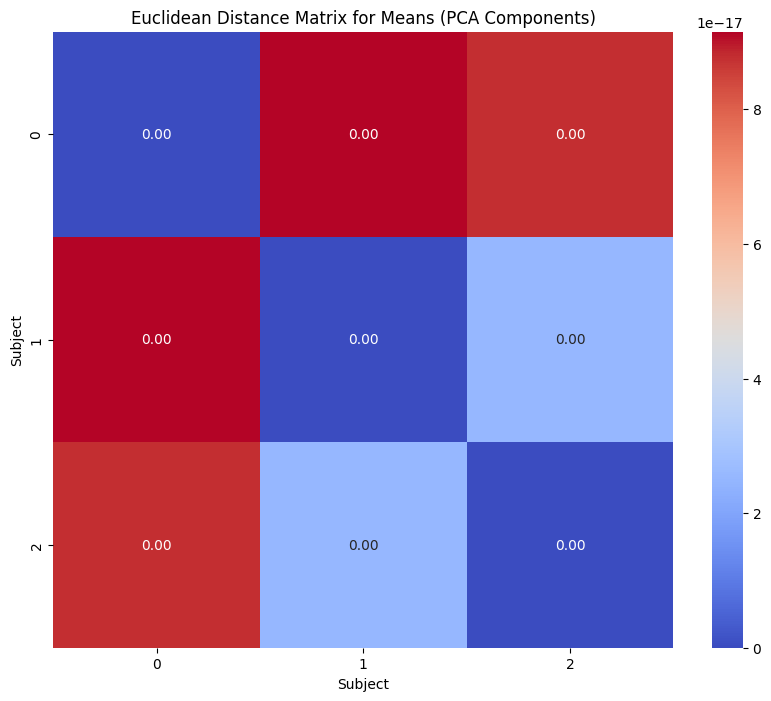

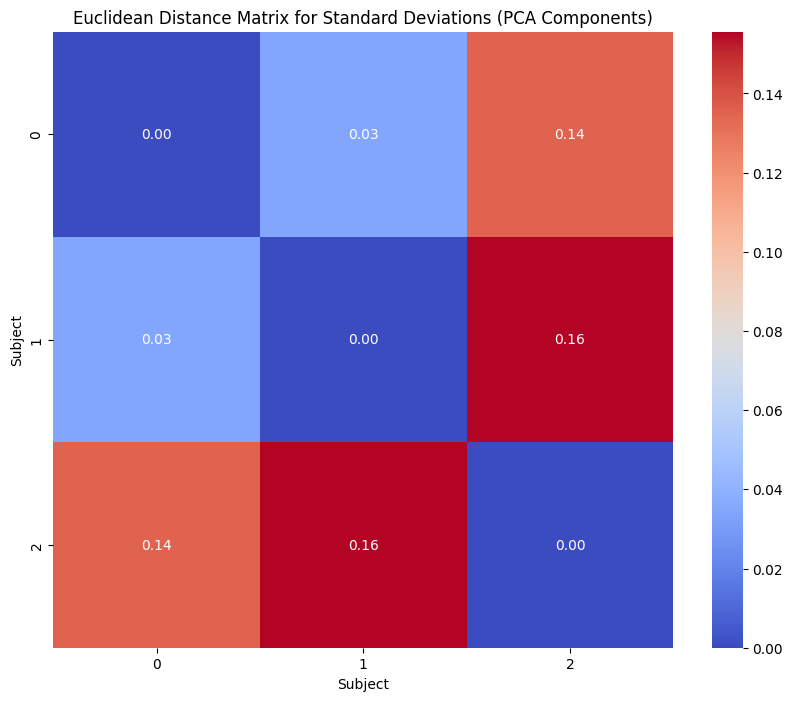

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distance_matrix_means' and 'distance_matrix_stds' are defined from the previous step

# Plotting Heatmap for Mean Distance Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Euclidean Distance Matrix for Means (PCA Components)')
plt.xlabel('Subject')
plt.ylabel('Subject')
plt.show()

# Plotting Heatmap for Standard Deviation Distance Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_stds, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Euclidean Distance Matrix for Standard Deviations (PCA Components)')
plt.xlabel('Subject')
plt.ylabel('Subject')
plt.show()


### **Scatter Plot or Bar Graph**

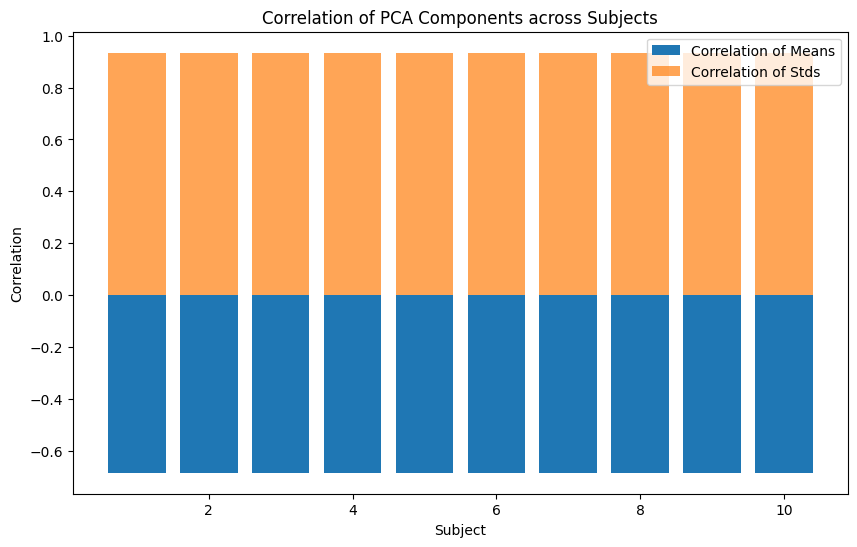

In [ ]:
# Assuming 'corr_means' and 'corr_stds' are defined from the previous step

# Subjects
subjects = list(range(1, 11))  # Adjust based on actual subject numbers

plt.figure(figsize=(10, 6))
plt.bar(subjects, corr_means, label='Correlation of Means')
plt.bar(subjects, corr_stds, label='Correlation of Stds', alpha=0.7)
plt.xlabel('Subject')
plt.ylabel('Correlation')
plt.title('Correlation of PCA Components across Subjects')
plt.legend()
plt.show()


### **Correlation Analysis**

====== Subject number 1 =====


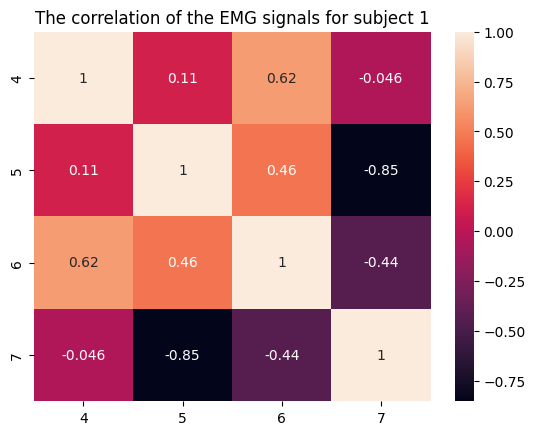

====== Subject number 2 =====


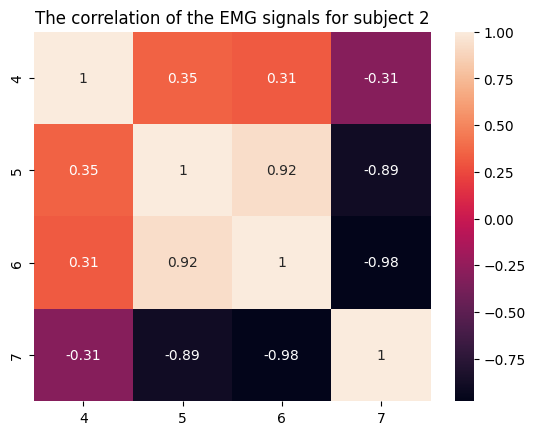

====== Subject number 3 =====


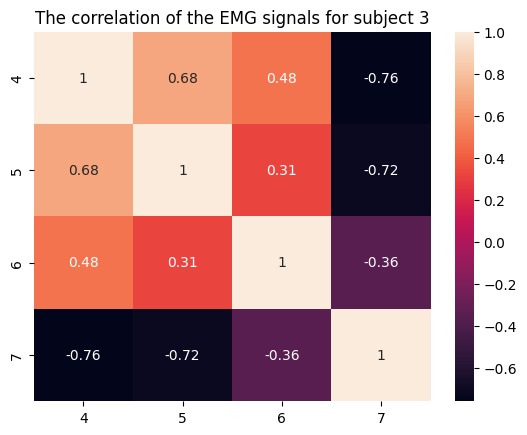

====== Subject number 4 =====


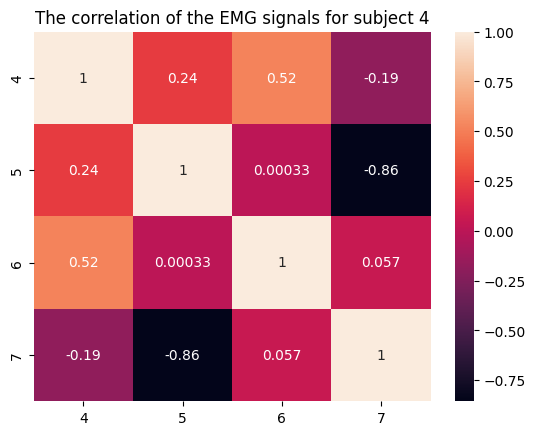

====== Subject number 5 =====


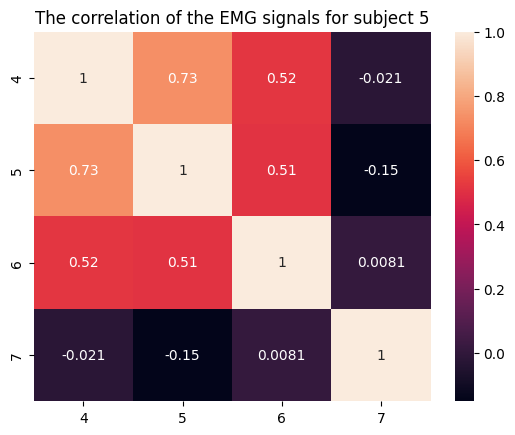

====== Subject number 6 =====


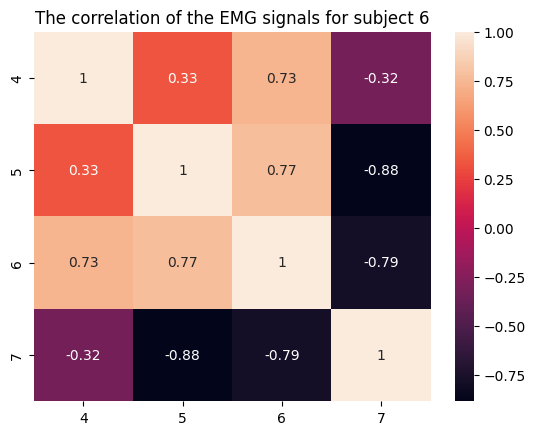

====== Subject number 7 =====


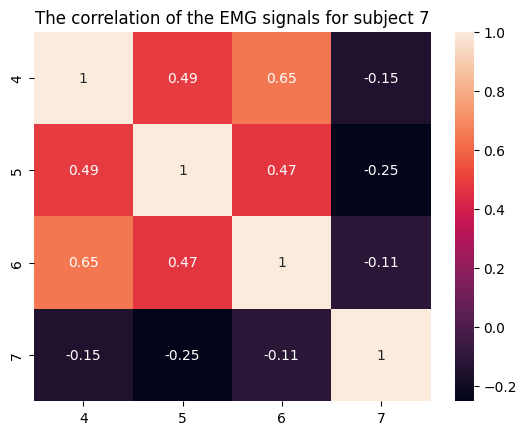

====== Subject number 8 =====


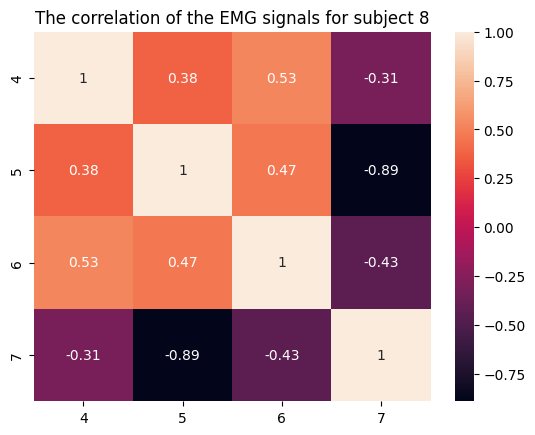

====== Subject number 9 =====


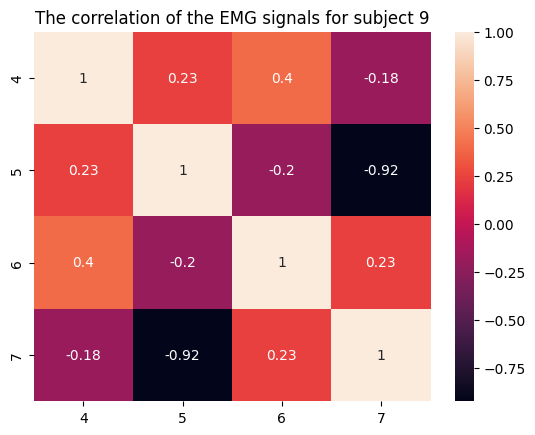

====== Subject number 10 =====


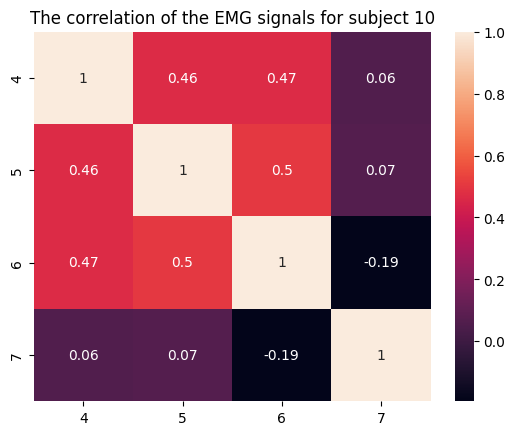

In [ ]:
def correlation(data, sub_num):
    data1 = full_data[full_data['subject_num'] == sub_num]
    graph = sns.heatmap(data1.drop('subject_num', axis=1).corr(), annot=True)
    graph.set_title(f'The correlation of the EMG signals for subject {sub_num}')
    plt.show()
for i in range(1, 11):
    print(f'====== Subject number {i} =====')
    correlation(full_data, i)

In [ ]:
import pandas as pd

def correlation_summary(data):
    summary = []
    for i in range(1, 11):
        data1 = data[data['subject_num'] == i]
        corr_values = data1.drop('subject_num', axis=1).corr().values.flatten()
        corr_values = abs(corr_values)
        avg_corr = corr_values.mean()
        std_corr = corr_values.std()
        min_corr = corr_values.min()
        max_corr = corr_values.max()

        summary.append({
            'Subject': f'Subject {i}',
            'Average Correlation': avg_corr,
            'Standard Deviation': std_corr,
            'Minimum Correlation': min_corr,
            'Maximum Correlation': max_corr
        })

    return pd.DataFrame(summary)
summary_data = correlation_summary(full_data)
summary_data.sort_values('Standard Deviation') # Sorting based on Standard Deviation

,Subject,Average Correlation,Standard Deviation,Minimum Correlation,Maximum Correlation
2,Subject 3,0.664917,0.246676,0.313062,1.0
5,Subject 6,0.728619,0.250190,0.322525,1.0
7,Subject 8,0.625405,0.270298,0.307918,1.0
1,Subject 2,0.720004,0.309674,0.309928,1.0
6,Subject 7,0.514988,0.326971,0.113796,1.0
0,Subject 1,0.566832,0.347245,0.046355,1.0
9,Subject 10,0.469818,0.347771,0.060204,1.0
8,Subject 9,0.520459,0.357548,0.179285,1.0
4,Subject 5,0.492095,0.378638,0.008077,1.0
3,Subject 4,0.482400,0.393229,0.000334,1.0


### **Checking data distribution**

====== Subject number 1 =====


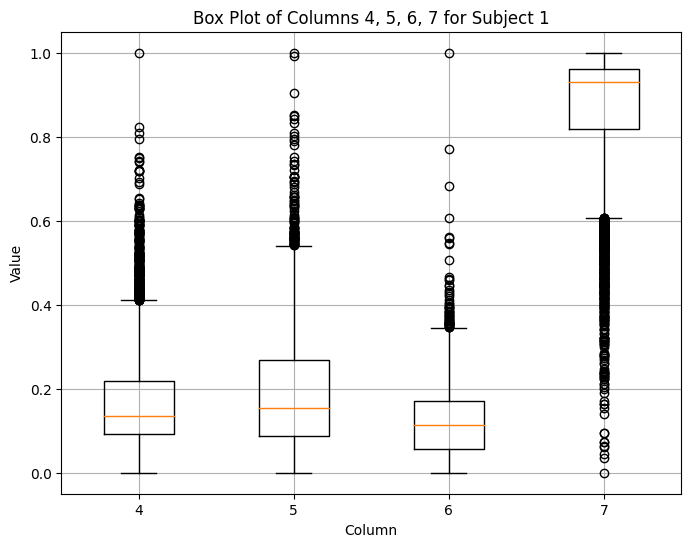

====== Subject number 2 =====


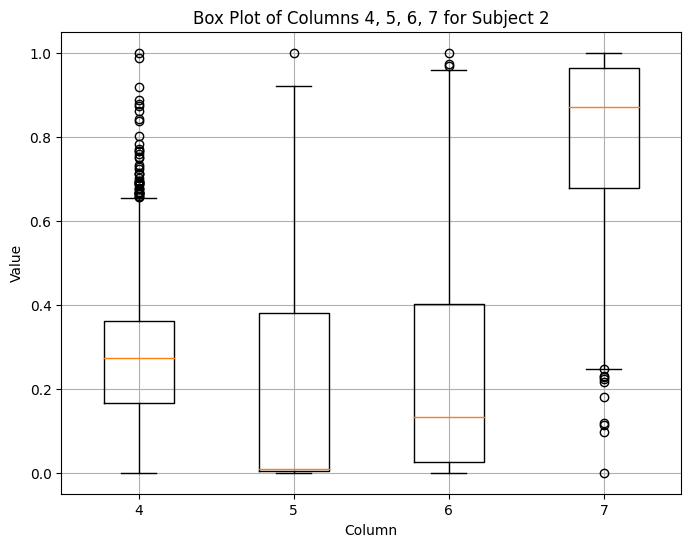

====== Subject number 3 =====


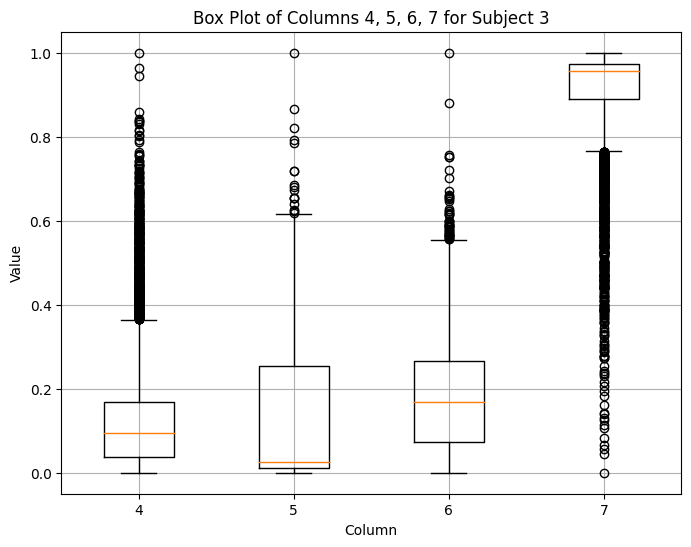

====== Subject number 4 =====


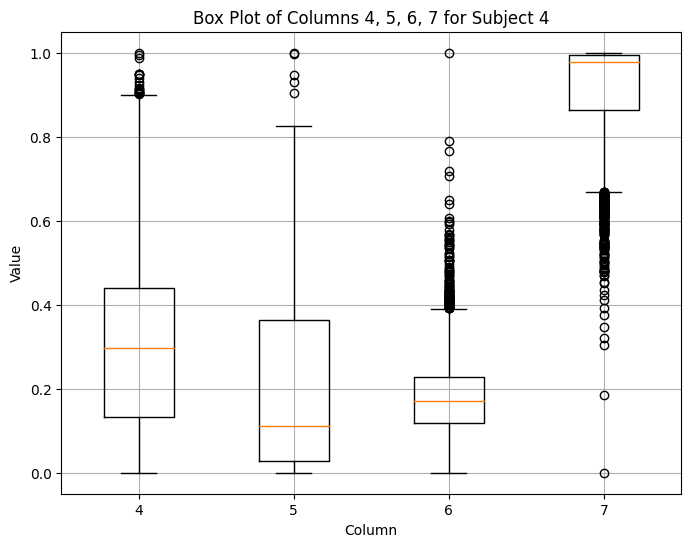

====== Subject number 5 =====


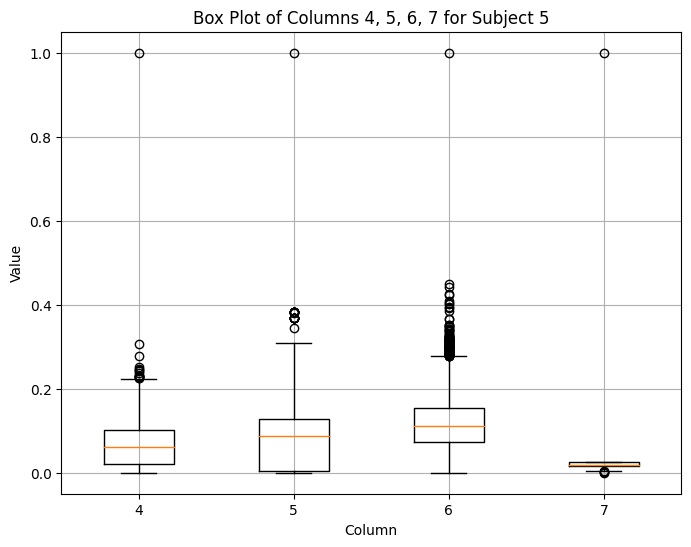

====== Subject number 6 =====


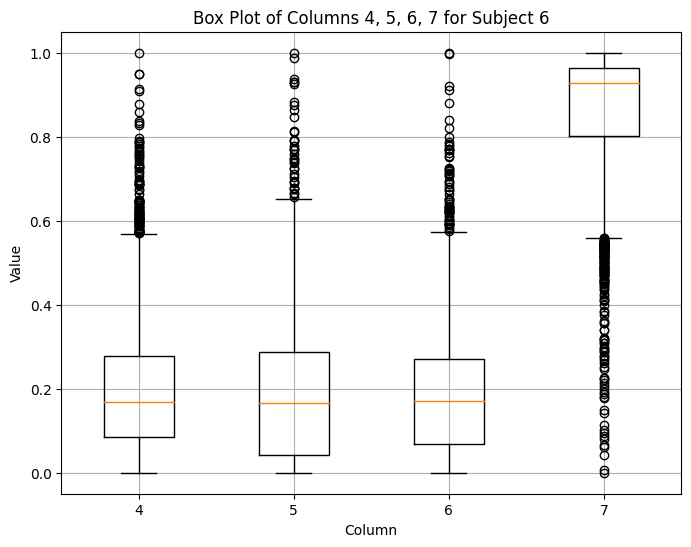

====== Subject number 7 =====


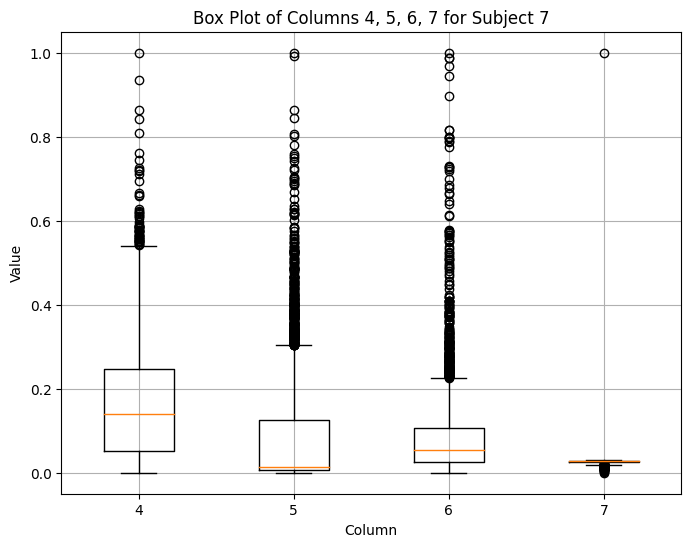

====== Subject number 8 =====


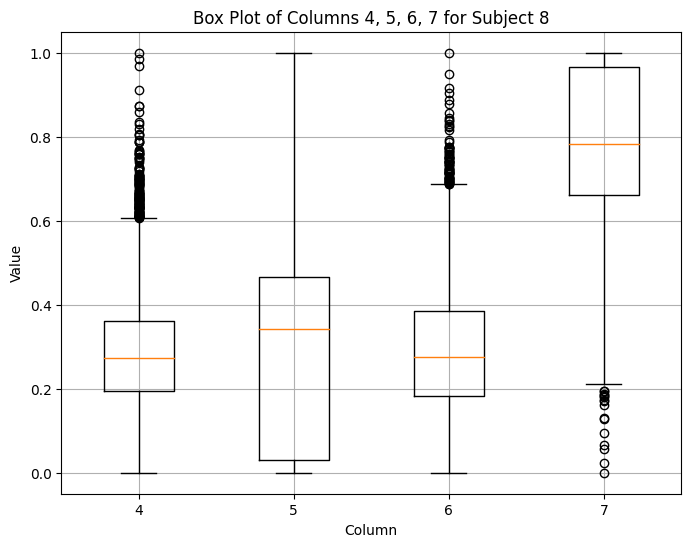

====== Subject number 9 =====


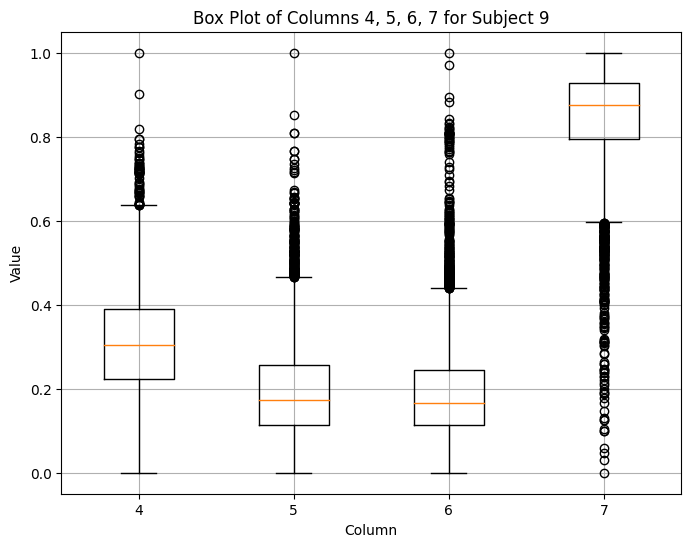

====== Subject number 10 =====


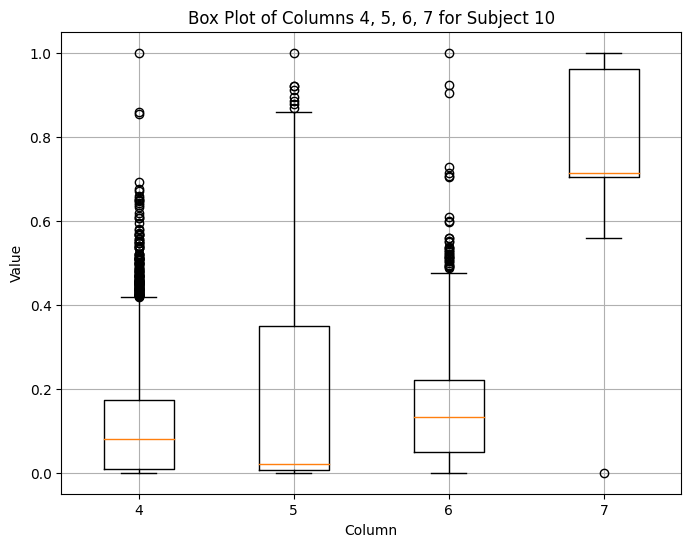

In [ ]:
for i in range(1, 11):
    print(f'====== Subject number {i} =====')
    data_subject = full_data[full_data['subject_num'] == i]
    data_columns = [data_subject[col] for col in [4, 5, 6, 7]]

    plt.figure(figsize=(8, 6))
    plt.boxplot(data_columns, labels=[4, 5, 6, 7], showfliers=True)

    plt.title(f'Box Plot of Columns 4, 5, 6, 7 for Subject {i}')
    plt.xlabel('Column')
    plt.ylabel('Value')

    plt.grid(True)
    plt.show()


### **Bar graph for every channel**

====== Subject number 1 =====


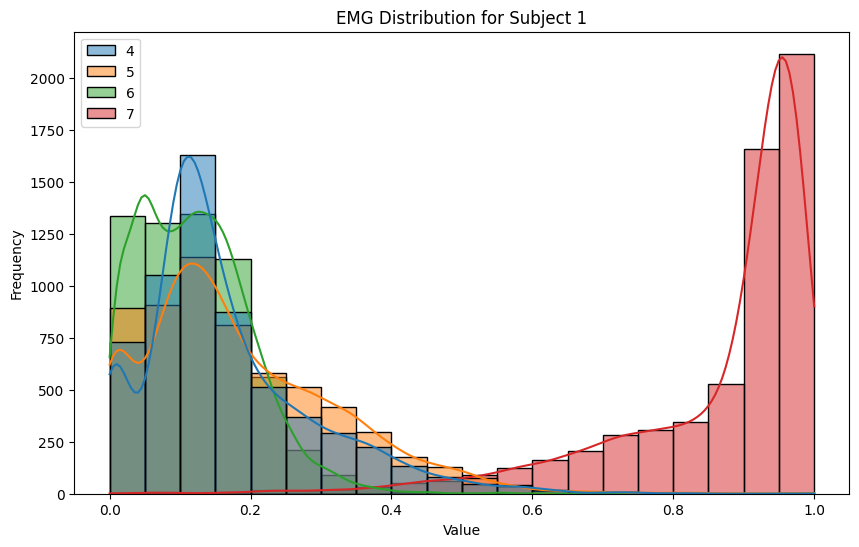

====== Subject number 2 =====


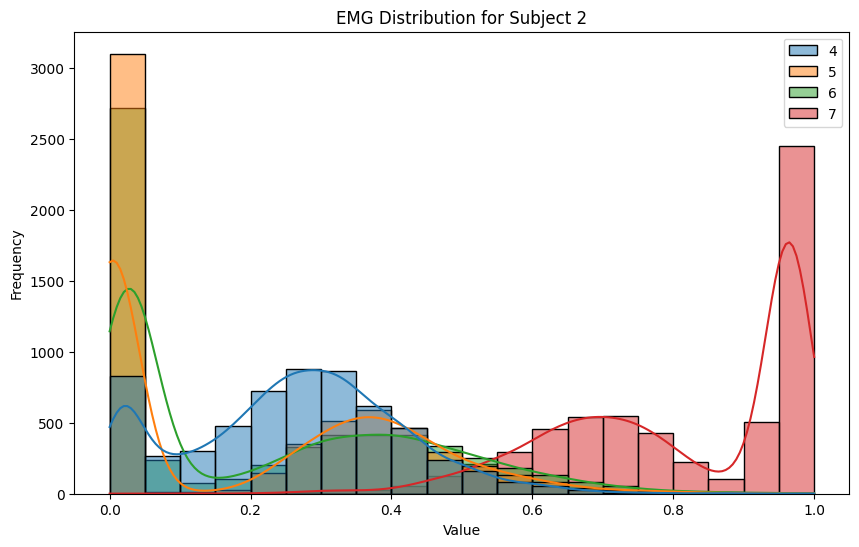

====== Subject number 3 =====


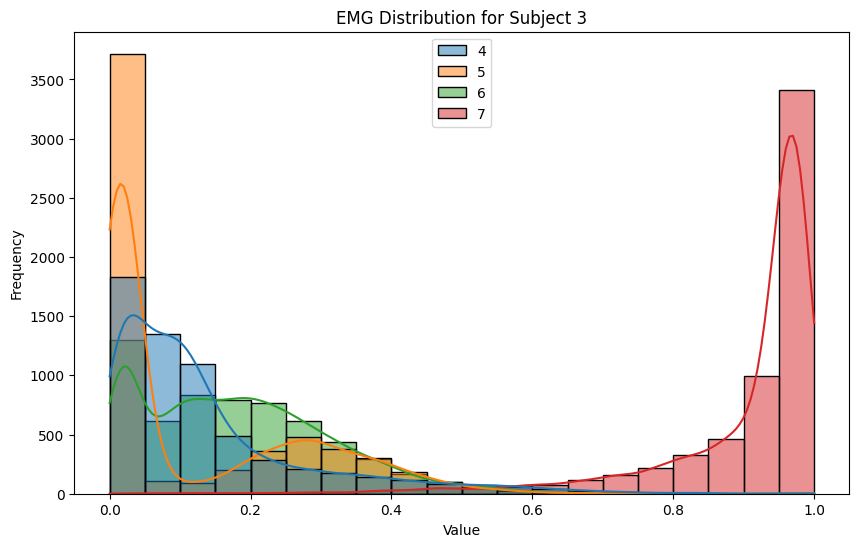

====== Subject number 4 =====


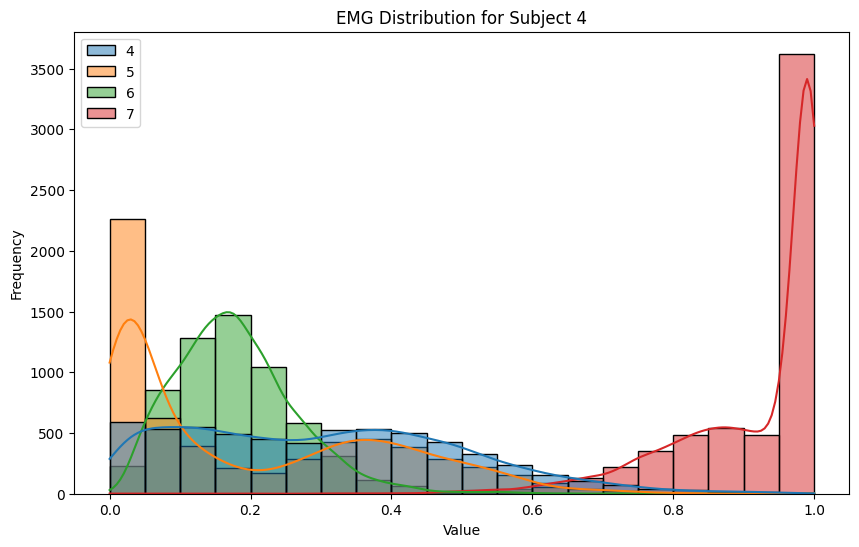

====== Subject number 5 =====


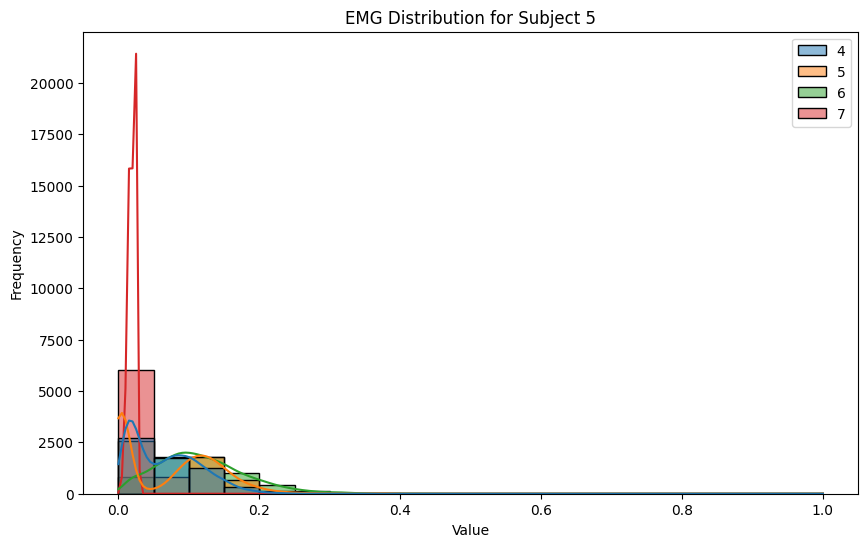

====== Subject number 6 =====


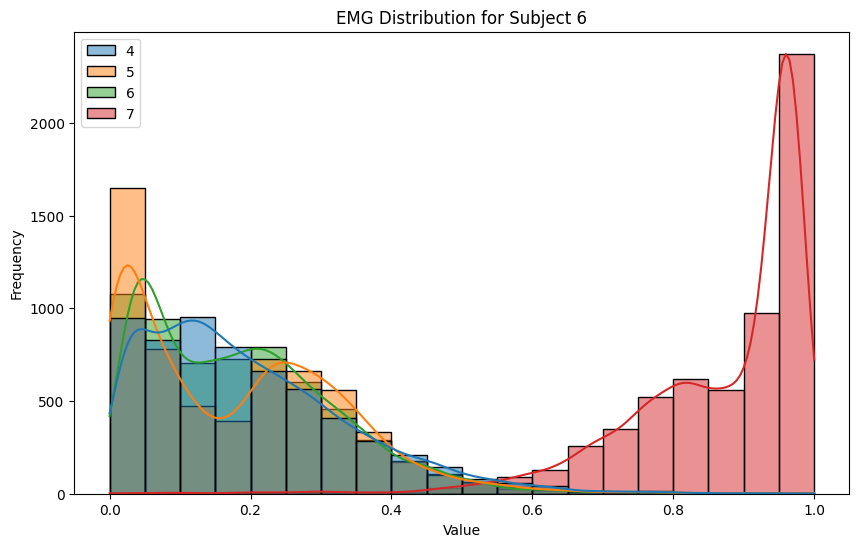

====== Subject number 7 =====


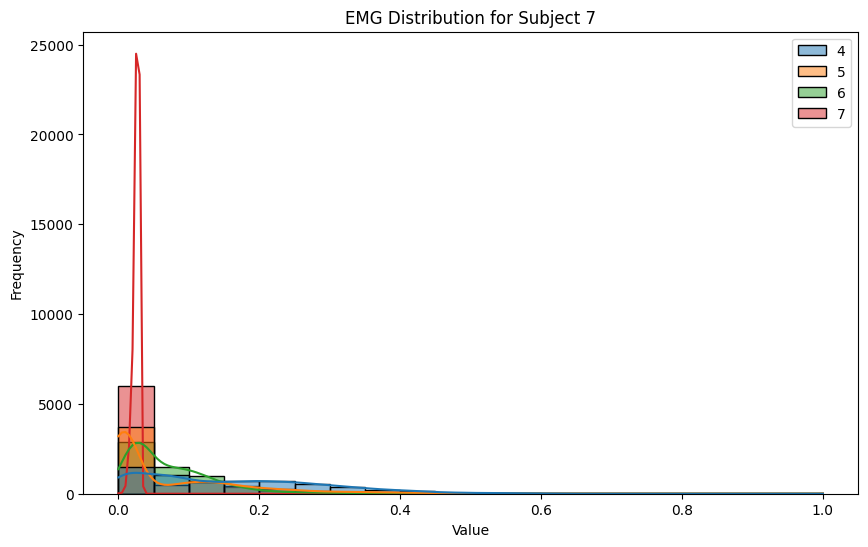

====== Subject number 8 =====


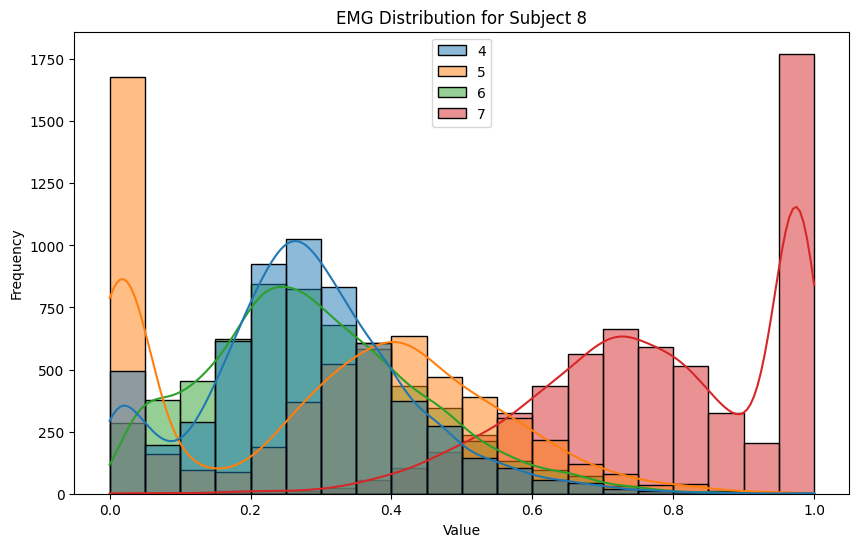

====== Subject number 9 =====


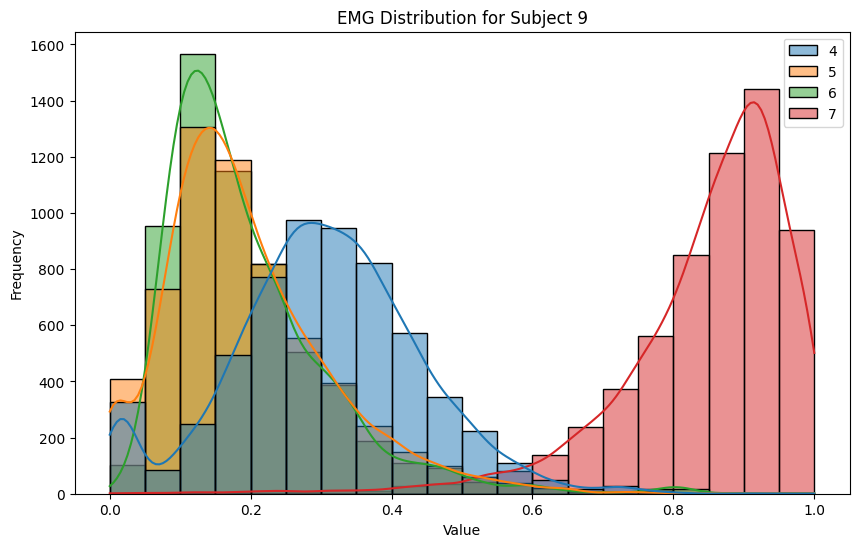

====== Subject number 10 =====


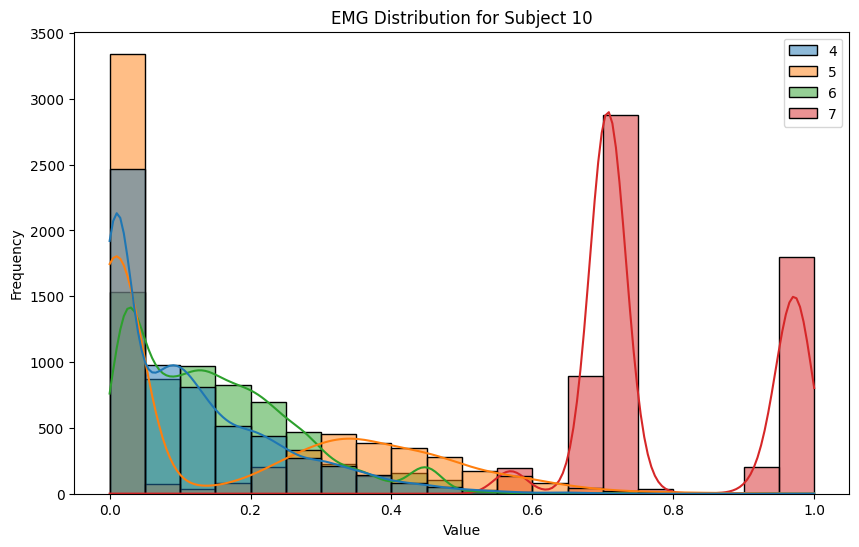

In [ ]:
grouped_data = full_data.groupby('subject_num')

for subject, data in grouped_data:
    print(f'====== Subject number {subject} =====')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data.drop('subject_num', axis=1), bins=20, kde=True)
    plt.title(f"EMG Distribution for Subject {subject}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()